In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD

170508288/170498071 [==============================] - 3s 0us/step


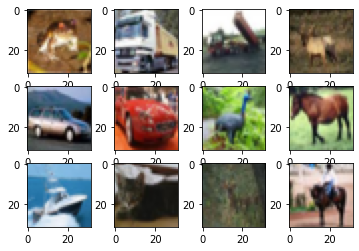

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

for i in range(12):
	plt.subplot(3,4, i+1)
	plt.imshow(x_train[i])
plt.show()

In [ ]:
x_test = np.append(x_test,x_train[:2000],axis = 0)
y_test = np.append(y_test,y_train[:2000],axis = 0)

print('test: X=%s, y=%s' % (x_test.shape, y_test.shape))
x_train = x_train[2000:]
y_train = y_train[2000:]
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))


test: X=(12000, 32, 32, 3), y=(12000, 1)
Train: X=(48000, 32, 32, 3), y=(48000, 1)


In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train, y_test = to_categorical(y_train,10), to_categorical(y_test,10)

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size= (2,2), activation='relu', padding= 'same', input_shape = (32,32,3)))
cnn_model.add(Conv2D(filters=32, kernel_size = (2,2), activation='relu', padding= 'same'))
cnn_model.add(MaxPooling2D())
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation = 'relu' ))
cnn_model.add(Dense(10, activation = 'softmax'))
opt = SGD(momentum = 0.9)
cnn_model.compile(optimizer= opt,loss = 'categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()
history_cnn = cnn_model.fit(x_train, y_train, epochs=15, validation_split = 0.25, batch_size=64, verbose = 1 )

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        416       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               4194816   
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                      

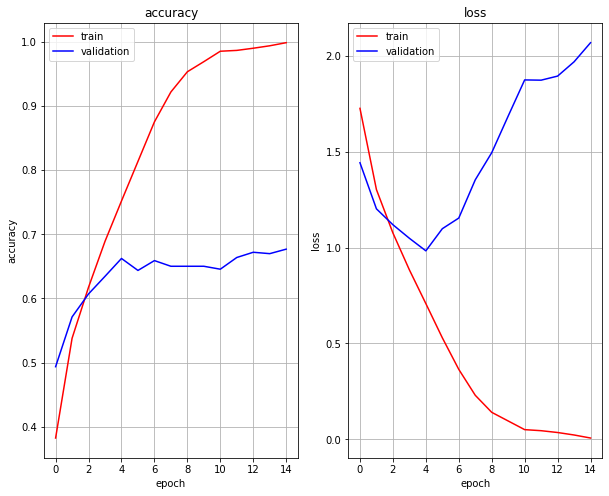

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 8)

plt.xlabel('epoch')
axs[0].set(xlabel='epoch', ylabel='accuracy')
axs[0].plot(history_cnn.history['accuracy'],'r')
axs[0].plot(history_cnn.history['val_accuracy'],'b')
axs[0].legend(['train', 'validation'], loc='best')
axs[0].set_title('accuracy')
axs[0].grid()

axs[1].set(xlabel='epoch', ylabel='loss')
axs[1].plot(history_cnn.history['loss'],'r')
axs[1].plot(history_cnn.history['val_loss'],'b')
axs[1].legend(['train', 'validation'], loc='best')
axs[1].set_title('loss')
axs[1].grid()

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size= (2,2), activation='relu', padding= 'same', input_shape = (32,32,3)))
cnn_model.add(Conv2D(filters=32, kernel_size = (2,2), activation='relu', padding= 'same'))
cnn_model.add(MaxPooling2D())
cnn_model.add(Conv2D(filters=64, kernel_size = (2,2), activation='relu', padding= 'same'))
cnn_model.add(MaxPooling2D())
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation = 'relu' ))
cnn_model.add(Dense(10, activation = 'softmax'))
opt = SGD(momentum = 0.9)
cnn_model.compile(optimizer= opt,loss = 'categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()
history_cnn = cnn_model.fit(x_train, y_train, epochs=15, validation_split = 0.25, batch_size=64, verbose = 1 )

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        416       
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 64)        8256      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4096)             

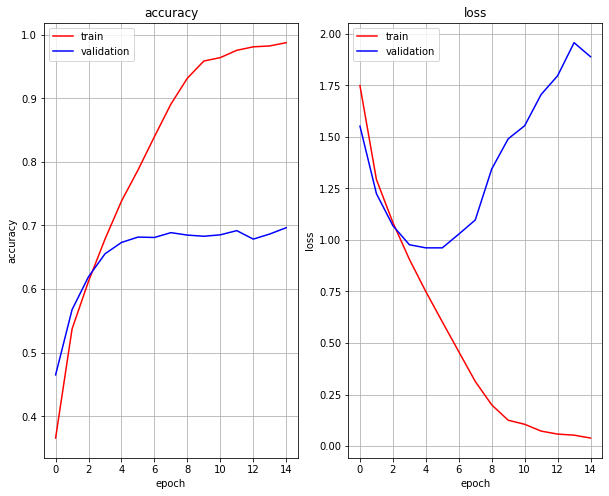

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 8)

plt.xlabel('epoch')
axs[0].set(xlabel='epoch', ylabel='accuracy')
axs[0].plot(history_cnn.history['accuracy'],'r')
axs[0].plot(history_cnn.history['val_accuracy'],'b')
axs[0].legend(['train', 'validation'], loc='best')
axs[0].set_title('accuracy')
axs[0].grid()

axs[1].set(xlabel='epoch', ylabel='loss')
axs[1].plot(history_cnn.history['loss'],'r')
axs[1].plot(history_cnn.history['val_loss'],'b')
axs[1].legend(['train', 'validation'], loc='best')
axs[1].set_title('loss')
axs[1].grid()

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size= (2,2), activation='relu', padding= 'same', input_shape = (32,32,3)))
cnn_model.add(Conv2D(filters=32, kernel_size = (2,2), activation='relu', padding= 'same'))
cnn_model.add(MaxPooling2D())

cnn_model.add(Conv2D(filters=64, kernel_size = (2,2), activation='relu', padding= 'same'))
cnn_model.add(MaxPooling2D())

cnn_model.add(Conv2D(filters=128, kernel_size = (2,2), activation='relu', padding= 'same'))
cnn_model.add(MaxPooling2D())

cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation = 'relu' ))
cnn_model.add(Dense(10, activation = 'softmax'))
opt = SGD(momentum = 0.9)
cnn_model.compile(optimizer= opt,loss = 'categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()
history_cnn = cnn_model.fit(x_train, y_train, epochs=15, validation_split = 0.25, batch_size=64, verbose = 1 )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        416       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        8256      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 128)        

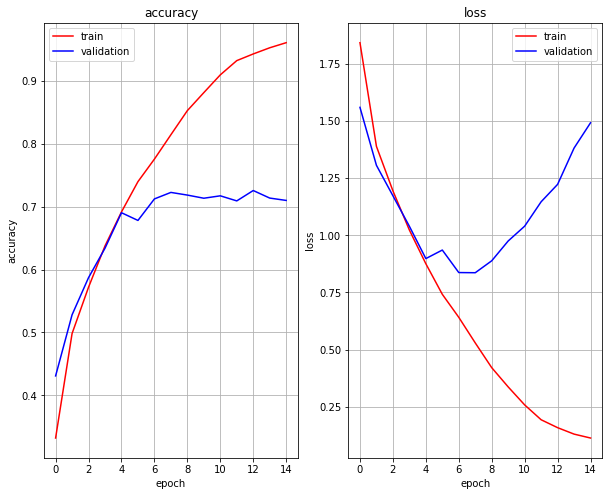

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 8)

plt.xlabel('epoch')
axs[0].set(xlabel='epoch', ylabel='accuracy')
axs[0].plot(history_cnn.history['accuracy'],'r')
axs[0].plot(history_cnn.history['val_accuracy'],'b')
axs[0].legend(['train', 'validation'], loc='best')
axs[0].set_title('accuracy')
axs[0].grid()

axs[1].set(xlabel='epoch', ylabel='loss')
axs[1].plot(history_cnn.history['loss'],'r')
axs[1].plot(history_cnn.history['val_loss'],'b')
axs[1].legend(['train', 'validation'], loc='best')
axs[1].set_title('loss')
axs[1].grid()

##comparision between activations 

In [ ]:
activations = ['relu', 'tanh']
models = []
history_different_activation = []
y_predict_different_activaion = []
for i in range(len(activations)):
  models.append(Sequential())
  models[i].add(Conv2D(32, (2,2), padding = 'same', activation= activations[i], input_shape = (32,32,3)))
  models[i].add(Conv2D(32, (2,2), padding = 'same', activation= activations[i]))
  models[i].add(MaxPooling2D((2,2)))
  models[i].add(Conv2D(64, (2,2), padding = 'same', activation= activations[i]))
  models[i].add(MaxPooling2D((2,2)))
  models[i].add(Flatten())
  models[i].add(Dense(512, activation= activations[i]))
  models[i].add(Dense(10, activation= 'softmax'))
  opt = SGD(learning_rate=0.005,momentum=0.9)
  models[i].compile(loss= 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  history_different_activation.append(models[i].fit(x_train, y_train, epochs=10, batch_size = 64, validation_split=0.25, verbose = 1))
  # y_predict_different_activaion.append(models[i].predict(test_x))

Epoch 1/10
563/563 [==============================] - 80s 23ms/step - loss: 1.9063 - accuracy: 0.3156 - val_loss: 1.6847 - val_accuracy: 0.4052
Epoch 2/10
563/563 [==============================] - 13s 22ms/step - loss: 1.4676 - accuracy: 0.4723 - val_loss: 1.3662 - val_accuracy: 0.5128
Epoch 3/10
563/563 [==============================] - 13s 22ms/step - loss: 1.2960 - accuracy: 0.5362 - val_loss: 1.3088 - val_accuracy: 0.5297
Epoch 4/10
563/563 [==============================] - 13s 22ms/step - loss: 1.1815 - accuracy: 0.5792 - val_loss: 1.2134 - val_accuracy: 0.5717
Epoch 5/10
563/563 [==============================] - 13s 22ms/step - loss: 1.0783 - accuracy: 0.6193 - val_loss: 1.1488 - val_accuracy: 0.5886
Epoch 6/10
563/563 [==============================] - 12s 22ms/step - loss: 0.9842 - accuracy: 0.6536 - val_loss: 1.1224 - val_accuracy: 0.6012
Epoch 7/10
563/563 [==============================] - 12s 22ms/step - loss: 0.8871 - accuracy: 0.6861 - val_loss: 1.1314 - val_accuracy:

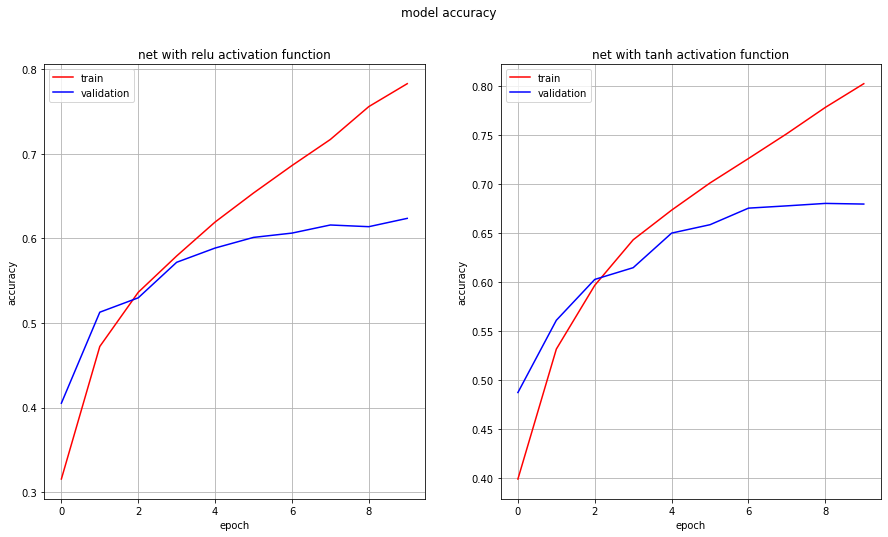

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(15, 8)
fig.suptitle('model accuracy')
plt.xlabel('epoch')
for i,ax in enumerate(axs):
  ax.set(xlabel='epoch', ylabel='accuracy')
  ax.plot(history_different_activation[i].history['accuracy'],'r')
  ax.plot(history_different_activation[i].history['val_accuracy'],'b')
  ax.legend(['train', 'validation'], loc='best')
  ax.set_title('net with {} activation function'.format(activations[i]))
  ax.grid()

##comparision between optimizers

In [ ]:
optimizers = ['sgd', 'adam']
models = []
history_different_opts= []
y_predict_different_opts = []
for i in range(len(optimizers)):
  models.append(Sequential())
  models[i].add(Conv2D(32, (2,2), padding = 'same', activation= 'tanh', input_shape = (32,32,3)))
  models[i].add(Conv2D(32, (2,2), padding = 'same', activation= 'tanh'))
  models[i].add(MaxPooling2D((2,2)))
  models[i].add(Conv2D(64, (2,2), padding = 'same', activation= 'tanh'))
  models[i].add(MaxPooling2D((2,2)))
  models[i].add(Flatten())
  models[i].add(Dense(512, activation= 'tanh'))
  models[i].add(Dense(10, activation= 'softmax'))
  models[i].compile(loss= 'categorical_crossentropy', optimizer = optimizers[i], metrics=['accuracy'])
  history_different_opts.append(models[i].fit(x_train, y_train, epochs=10, batch_size = 64, validation_split=0.25, verbose = 1))


Epoch 1/10
563/563 [==============================] - 95s 167ms/step - loss: 1.9577 - accuracy: 0.3164 - val_loss: 1.7921 - val_accuracy: 0.3772
Epoch 2/10
563/563 [==============================] - 94s 167ms/step - loss: 1.6595 - accuracy: 0.4231 - val_loss: 1.6636 - val_accuracy: 0.4132
Epoch 3/10
563/563 [==============================] - 95s 168ms/step - loss: 1.5330 - accuracy: 0.4654 - val_loss: 1.4979 - val_accuracy: 0.4765
Epoch 4/10
563/563 [==============================] - 95s 168ms/step - loss: 1.4425 - accuracy: 0.4974 - val_loss: 1.4376 - val_accuracy: 0.4973
Epoch 5/10
563/563 [==============================] - 94s 167ms/step - loss: 1.3575 - accuracy: 0.5277 - val_loss: 1.3922 - val_accuracy: 0.5167
Epoch 6/10
563/563 [==============================] - 96s 171ms/step - loss: 1.2764 - accuracy: 0.5576 - val_loss: 1.3030 - val_accuracy: 0.5463
Epoch 7/10
563/563 [==============================] - 98s 174ms/step - loss: 1.2037 - accuracy: 0.5844 - val_loss: 1.2378 - val_ac

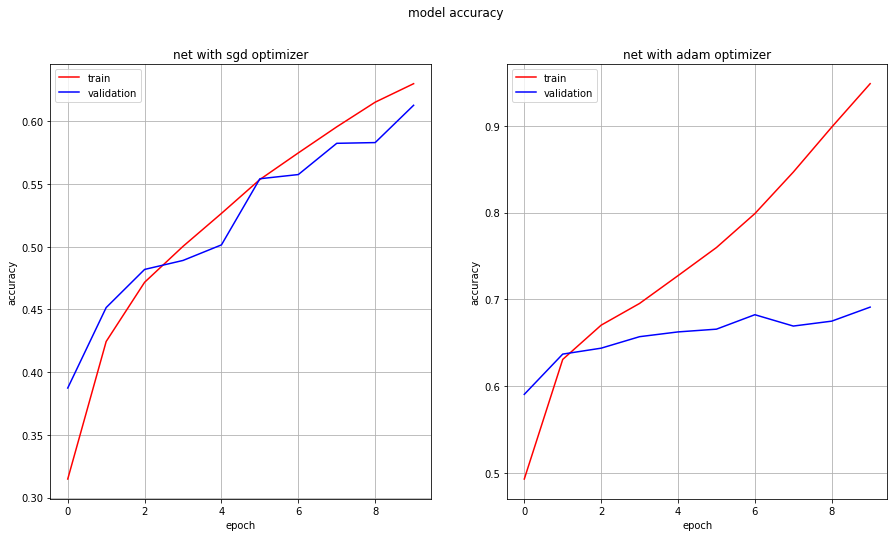

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(15, 8)
fig.suptitle('model accuracy')
plt.xlabel('epoch')
for i,ax in enumerate(axs):
  ax.set(xlabel='epoch', ylabel='accuracy')
  ax.plot(history_different_opts[i].history['accuracy'],'r')
  ax.plot(history_different_opts[i].history['val_accuracy'],'b')
  ax.legend(['train', 'validation'], loc='best')
  ax.set_title('net with {} optimizer'.format(optimizers[i]))
  ax.grid()

##dropout rate effect

In [ ]:
cnn_models_pool_dropout = []
histories_with_dropout = []
dropout_rates = [0.2,0.3,0.5]
for i in range(len(dropout_rates)):

  cnn_models_pool_dropout.append(Sequential())

  cnn_models_pool_dropout[i].add(Conv2D(filters=32, kernel_size= (2,2), activation='relu', padding= 'same', input_shape = (32,32,3)))
  cnn_models_pool_dropout[i].add(Conv2D(filters=32, kernel_size= (2,2), activation='relu', padding= 'same'))
  cnn_models_pool_dropout[i].add(MaxPooling2D())
  cnn_models_pool_dropout[i].add(Dropout(dropout_rates[i]))

  cnn_models_pool_dropout[i].add(Conv2D(filters=64, kernel_size = (2,2), activation='relu', padding= 'same'))
  cnn_models_pool_dropout[i].add(MaxPooling2D())
  cnn_models_pool_dropout[i].add(Dropout(dropout_rates[i]))

  cnn_models_pool_dropout[i].add(Flatten())

  cnn_models_pool_dropout[i].add(Dense(256, activation = 'relu' ))
  cnn_models_pool_dropout[i].add(Dense(10, activation = 'softmax'))
  cnn_models_pool_dropout[i].compile(optimizer='adam',loss = 'categorical_crossentropy', metrics=['accuracy'])
  histories_with_dropout.append(cnn_models_pool_dropout[i].fit(x_train, y_train, epochs=15, validation_split = 0.25, batch_size=64, verbose = None ))

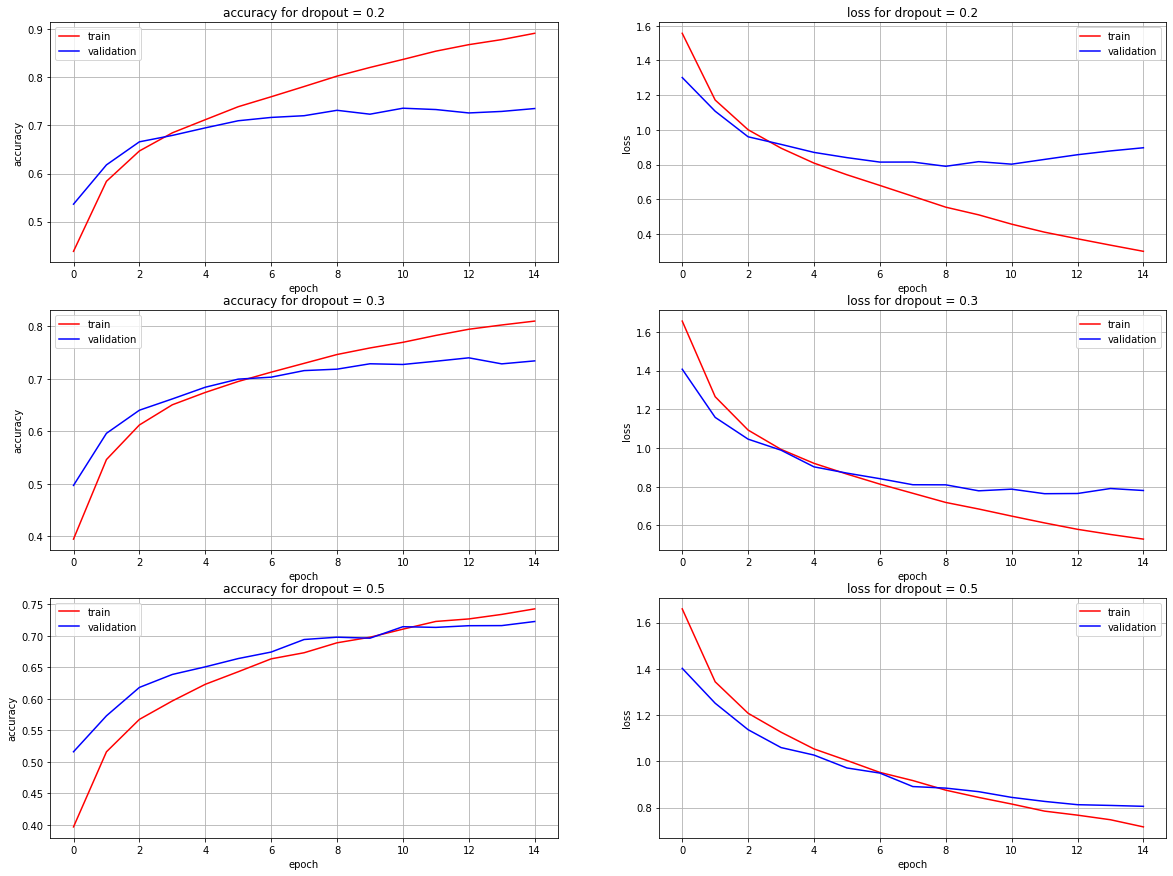

In [ ]:
fig, axes = plt.subplots(3, 2)
fig.set_size_inches(20, 15)
for i,axs in enumerate(axes):
    plt.xlabel('epoch')
    axs[0].set(xlabel='epoch', ylabel='accuracy')
    axs[0].plot(histories_with_dropout[i].history['accuracy'],'r')
    axs[0].plot(histories_with_dropout[i].history['val_accuracy'],'b')
    axs[0].legend(['train', 'validation'], loc='best')
    axs[0].set_title('accuracy for dropout = {}'.format(dropout_rates[i]))
    axs[0].grid()

    axs[1].set(xlabel='epoch', ylabel='loss')
    axs[1].plot(histories_with_dropout[i].history['loss'],'r')
    axs[1].plot(histories_with_dropout[i].history['val_loss'],'b')
    axs[1].legend(['train', 'validation'], loc='best')
    axs[1].set_title('loss for dropout = {}'.format(dropout_rates[i]))
    axs[1].grid()